In [1]:
# Import modules and load dataset

import numpy as np
import pandas as pd

data = pd.read_csv("german_credit_data.csv", index_col=0)
orig = data.copy() # Keep the original just for good measure
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [2]:
# Perform binning for age - we will bin age into two categories - young (defined as <= 30) and old (defined as > 30)

def bin_age(age):
    if age <= 30:
        return "young"
    else:
        return "old"

data["Age"] = data["Age"].apply(bin_age)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,old,male,2,own,NaN,little,1169,6,radio/TV,good
1,young,female,2,own,little,moderate,5951,48,radio/TV,bad
2,old,male,1,own,little,NaN,2096,12,education,good
3,old,male,2,free,little,little,7882,42,furniture/equipment,good
4,old,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,old,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,old,male,3,own,little,little,3857,30,car,good
997,old,male,2,own,little,NaN,804,12,radio/TV,good
998,young,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
# Perform ordinal encoding on the savings accounts and checkings accounts to get them as a number

map_savings = {
    float("nan"): 0,
    "little": 1,
    "moderate": 2,
    "quite rich": 3,
    "rich": 4
}

map_checking = {
    float("nan"): 0,
    "little": 1,
    "moderate": 2,
    "rich": 3
}

data["Saving accounts"] = data["Saving accounts"].map(map_savings)
data["Checking account"] = data["Checking account"].map(map_checking)

In [4]:
# Analyse old vs young divide - values in comments to save a load of print statements

old = data.loc[data["Age"] == "old"]
young = data.loc[data["Age"] == "young"]

count_old = len(old.index) # 589
count_young = len(young.index) # 411

sex_old = old["Sex"].value_counts() # 461 male, 128 female
sex_young = young["Sex"].value_counts() # 229 male, 182 femalelit

avg_jobs_old = old["Job"].mean() # 1.92
var_jobs_old = old["Job"].var() # 0.470
avg_jobs_young = young["Job"].mean() # 1.88
var_jobs_young = young["Job"].var() # 0.366

housing_old = old["Housing"].value_counts() # 432 own, 94 free, 63 rent
housing_young = young["Housing"].value_counts() # 281 own, 116 rent, 14 free

savings_old = old["Saving accounts"].mean() # 1.18
savings_old_var = old["Saving accounts"].var() # 1.04
savings_young = young["Saving accounts"].mean() # 1.18
savings_young_var = young["Saving accounts"].var() # 0.790

checking_old = old["Checking account"].mean() # 0.927
checking_old_var = old["Checking account"].var() # 0.942
checking_young = young["Checking account"].mean() # 1.11
checking_young_var = young["Checking account"].var() # 0.862

credit_old = old["Credit amount"].mean() # 3338.825
credit_old_var = old["Credit amount"].var() # 8156321.281
credit_young = young["Credit amount"].mean() # 3174.428
credit_young_var = young["Credit amount"].var() # 7701028.041

duration_old = old["Duration"].mean() # 20.752
duration_old_var = old["Duration"].var() # 147.194
duration_young = young["Duration"].mean() # 21.119
duration_young_var = young["Duration"].var() # 143.139

purpose_old = old["Purpose"].value_counts() # 217 car, 155 radio/tv, 87 furniture/equipment
purpose_young = young["Purpose"].value_counts() # 125 radio/tv, 120 car, 94 furniture/equipment

old_outcome = old["Risk"].value_counts() # 437 good, 152 bad
young_outcome = young["Risk"].value_counts() # 263 good, 148 bad

# Clear bias here - young people, despite having higher balances and asking for slightly less money are rejected

In [5]:
# Analyse male vs female divide - this didn't feature in the report but I still did the analysis (mainly to see
# which was more interesting)

male = data.loc[data["Sex"] == "male"]
female = data.loc[data["Sex"] == "female"]

count_male = len(male.index) # 690
count_female = len(female.index) # 310

ages_male = male["Age"].value_counts() # 461 old, 229 young
ages_female = female["Age"].value_counts() # 182 young, 128 old

avg_jobs_male = male["Job"].mean() # 1.93
var_jobs_male = male["Job"].var() # 0.412
avg_jobs_female = female["Job"].mean() # 1.84
var_jobs_female = female["Job"].var() # 0.455

housing_male = male["Housing"].value_counts() # 517 own, 89 free, 84 rent
housing_female = female["Housing"].value_counts() # 196 own, 95 rent, 19 free

savings_male = male["Saving accounts"].mean() # 1.17
savings_male_var = male["Saving accounts"].var() # 0.920
savings_female = female["Saving accounts"].mean() # 1.23
savings_female_var = female["Saving accounts"].var() # 0.969

checking_male = male["Checking account"].mean() # 0.987
checking_male_var = male["Checking account"].var() # 0.919
checking_female = female["Checking account"].mean() # 1.03
checking_female_var = female["Checking account"].var() # 0.912

credit_male = male["Credit amount"].mean() # 3448.041
credit_male_var = male["Credit amount"].var() # 8412806.315
credit_female = female["Credit amount"].mean() # 2877.774
credit_female_var = female["Credit amount"].var() # 6776346.260

duration_male = male["Duration"].mean() # 21.561
duration_male_var = male["Duration"].var() # 154.702
duration_female = female["Duration"].mean() # 19.439
duration_female_var = female["Duration"].var() # 122.059

purpose_male = male["Purpose"].value_counts() # 243 car, 195 radio/tv, 107 furniture/equipment
purpose_female = female["Purpose"].value_counts() # 94 car, 85 radio/tv, 74 furniture/equipment

male_outcome = male["Risk"].value_counts() # 499 good, 191 bad
female_outcome = female["Risk"].value_counts() # 201 good, 109 bad


In [6]:
# Time for some machine learning implementation - first in processing some of this data
data

# Age, sex, housing, purpose and risk need to be encoded as values, then the whole thing needs to be normalised

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,old,male,2,own,0,1,1169,6,radio/TV,good
1,young,female,2,own,1,2,5951,48,radio/TV,bad
2,old,male,1,own,1,0,2096,12,education,good
3,old,male,2,free,1,1,7882,42,furniture/equipment,good
4,old,male,2,free,1,1,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,old,female,1,own,1,0,1736,12,furniture/equipment,good
996,old,male,3,own,1,1,3857,30,car,good
997,old,male,2,own,1,0,804,12,radio/TV,good
998,young,male,2,free,1,1,1845,45,radio/TV,bad


In [7]:
# Maps all the binary features to numeric values that encode the same information
data["Age"] = data["Age"].map(lambda x: 1 if x == "old" else 0)
data["Sex"] = data["Sex"].map(lambda x: 1 if x == "male" else 0)
data["Risk"] = data["Risk"].map(lambda x: 1 if x == "good" else 0)

In [8]:
# Performs one-hot encoding on remaining categorical variables

from sklearn.preprocessing import OneHotEncoder

housing_coder = OneHotEncoder(sparse=False)
purpose_coder = OneHotEncoder(sparse=False)

housing_oh = housing_coder.fit_transform(np.array(data["Housing"]).reshape(-1, 1))
purpose_oh = purpose_coder.fit_transform(np.array(data["Purpose"]).reshape(-1, 1))

housing_encoded = pd.DataFrame(housing_oh, columns=housing_coder.get_feature_names(), index=data.index)
purpose_encoded = pd.DataFrame(purpose_oh, columns=purpose_coder.get_feature_names(), index=data.index)

data = pd.concat([data, housing_encoded, purpose_encoded], axis=1)
data = data.drop(["Housing", "Purpose"], axis=1)

In [9]:
data

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,x0_free,x0_own,x0_rent,x0_business,x0_car,x0_domestic appliances,x0_education,x0_furniture/equipment,x0_radio/TV,x0_repairs,x0_vacation/others
0,1,1,2,0,1,1169,6,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,2,1,2,5951,48,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,1,0,2096,12,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,2,1,1,7882,42,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,2,1,1,4870,24,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,0,1736,12,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1,1,3,1,1,3857,30,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1,1,2,1,0,804,12,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0,1,2,1,1,1845,45,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
# Now time to perform min-max scaling so every variable is between 0 and 1 - not strictly necessary with the random
# forest classifier, but it doesn't hurt and makes it easy to swap out other algorithms without having to worry about it
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,x0_free,x0_own,x0_rent,x0_business,x0_car,x0_domestic appliances,x0_education,x0_furniture/equipment,x0_radio/TV,x0_repairs,x0_vacation/others
0,1.0,1.0,0.666667,0.00,0.333333,0.050567,0.029412,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.666667,0.25,0.666667,0.313690,0.647059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.333333,0.25,0.000000,0.101574,0.117647,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.666667,0.25,0.333333,0.419941,0.558824,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.666667,0.25,0.333333,0.254209,0.294118,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.333333,0.25,0.000000,0.081765,0.117647,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1.0,1.0,1.000000,0.25,0.333333,0.198470,0.382353,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.0,1.0,0.666667,0.25,0.000000,0.030483,0.117647,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,1.0,0.666667,0.25,0.333333,0.087763,0.602941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Ready for machine learning - time to split dataset

from sklearn.model_selection import train_test_split

X = data.drop(["Risk"], axis=1)
y = data["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [12]:
# Model evaluation helpers

from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Plots a single ROC curve
def plot_curve(tpr, fpr, title="ROC", x_label="FPR", y_label="TPR", legend_loc="lower right", curve_type="ROC"):
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=curve_type + "  curve (area = %0.2f)" % roc_auc)
    plt.plot([0,1], [0,1], "k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc=legend_loc)
    plt.show()

    
# Plots many ROC curves
def plot_all_roc(tprs, fprs, title, legend):
    plt.figure()    
    for i in range(len(tprs)):
        roc_auc = auc(fprs[i], tprs[i])
        plt.plot(fprs[i], tprs[i], label= "ROC curve - " + legend[i] + " (area = %0.2f)" % roc_auc)
    plt.plot([0,1], [0,1], "k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
# Scoring function for hyperparameter tuning
def score_auc(estimator, X, y):
    yp = estimator.predict_proba(X)[:, 1]
    score = roc_auc_score(y, yp)
    return score

# Calculates disparate impact score as defined by Feldman
def disparate_impact(p_over, p_under):
    return p_under/p_over

# Calculates zemel fairness (wasn't used in the report)
def zemel_fairness(p_over, p_under):
    return p_over - p_under

# Calculates a load of metrics
def eval_fair_acc(lrc, X_test_old_male, X_test_old_female, X_test_young_male, X_test_young_female, X_test, y_test, output=True):
    p_old = lrc.predict(pd.concat([X_test_old_male, X_test_old_female])).mean()
    p_young = lrc.predict(pd.concat([X_test_young_male, X_test_young_female])).mean()
    p_male = lrc.predict(pd.concat([X_test_young_male, X_test_old_male])).mean()
    p_female = lrc.predict(pd.concat([X_test_young_female, X_test_old_female])).mean()
    yp = lrc.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, yp).ravel()
    acc = (tn+tp)/(tn+fp+fn+tp)
    utility = 1 - (0.5*((fn/(fn+tp))+(fp/(fp+tn))))
    
    
    if output:
        print("Accuracy:", acc, "\nUtility:", utility)
        print("Old/Young ZF:", zemel_fairness(p_old, p_young), "\nOld/Young DI:", disparate_impact(p_old, p_young))
        print("Male/Female ZF:", zemel_fairness(p_male, p_female), "\nMale/Female DI:", disparate_impact(p_male, p_female))
    return acc, utility, zemel_fairness(p_old, p_young), disparate_impact(p_old, p_young), zemel_fairness(p_male, p_female), disparate_impact(p_male, p_female)

In [13]:
# Time to use the random forest

from sklearn.ensemble import RandomForestClassifier

# A number of hyperparameter combinations to try
min_samples_leaf = range(2,5)
max_features = ["sqrt", "log2"]
criterion = ["gini", "entropy"]
max_depth = list(range(10,12)) + [None]
min_samples_split = range(2,4) # Hyperparameters to tweak

hp_combs = [[msl, mf, c, md, mss] for msl in min_samples_leaf for mf in max_features for c in criterion for md in max_depth for mss in min_samples_split]

best = (-1, None, None)

# Iterate through all combinations and evaluate
for comb in hp_combs:
    clf = RandomForestClassifier(class_weight="balanced", n_jobs=-1, min_samples_leaf=comb[0], max_features=comb[1], criterion=comb[2], max_depth=comb[3], min_samples_split=comb[4], random_state=0)
    clf.fit(X_train, y_train)
    score = score_auc(clf, X_val, y_val)
    if score > best[0]:
        best = (score, clf, comb)
        
clf = best[1]
best_comb = best[2]

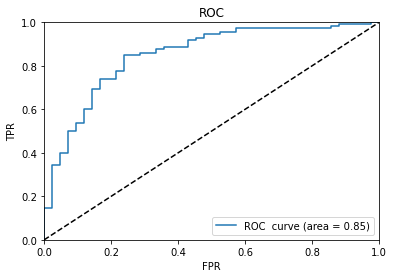

In [14]:
yp = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yp)
plot_curve(tpr, fpr)

In [15]:
# Split dataset into groups based on protected characteristics to compare prediction quality for different demographic groups

X_test_old_male = X_test.loc[(X_test["Sex"] == 1) & (X_test["Age"] == 1)]
y_test_old_male = y_test[X_test_old_male.index]

X_test_young_male = X_test.loc[(X_test["Sex"] == 1) & (X_test["Age"] == 0)]
y_test_young_male = y_test[X_test_young_male.index]

X_test_old_female = X_test.loc[(X_test["Sex"] == 0) & (X_test["Age"] == 1)]
y_test_old_female = y_test[X_test_old_female.index]

X_test_young_female = X_test.loc[(X_test["Sex"] == 0) & (X_test["Age"] == 0)]
y_test_young_female = y_test[X_test_young_female.index]

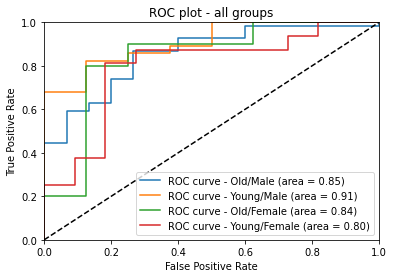

In [16]:
# Plot ROC curve for each demographic group

fprs = []
tprs = []

yp_om = clf.predict_proba(X_test_old_male)[:,1]
fpr, tpr, _ = roc_curve(y_test_old_male, yp_om)
fprs.append(fpr)
tprs.append(tpr)

yp_ym = clf.predict_proba(X_test_young_male)[:,1]
fpr, tpr, _ = roc_curve(y_test_young_male, yp_ym)
fprs.append(fpr)
tprs.append(tpr)

yp_of = clf.predict_proba(X_test_old_female)[:,1]
fpr, tpr, _ = roc_curve(y_test_old_female, yp_of)
fprs.append(fpr)
tprs.append(tpr)

yp_yf = clf.predict_proba(X_test_young_female)[:,1]
fpr, tpr, _ = roc_curve(y_test_young_female, yp_yf)
fprs.append(fpr)
tprs.append(tpr)

plot_all_roc(tprs, fprs, "ROC plot - all groups", ["Old/Male", "Young/Male", "Old/Female", "Young/Female"])

In [17]:
# Show measures of equality

eval_fair_acc(clf, X_test_old_male, X_test_old_female, X_test_young_male, X_test_young_female, X_test, y_test)

Accuracy: 0.8 
Utility: 0.7883597883597884
Old/Young ZF: 0.059113300492610765 
Old/Young DI: 0.9128329297820824
Male/Female ZF: 0.07619047619047625 
Male/Female DI: 0.8873239436619718


(0.8,
 0.7883597883597884,
 0.059113300492610765,
 0.9128329297820824,
 0.07619047619047625,
 0.8873239436619718)

In [18]:
# 77% of adults are over 30 but to test we'll sample 50% old, 50% young, 50% female, 50% male

# Split training set up into demographic groups
X_train_om = X_train.loc[(X_train["Sex"] == 1) & (X_train["Age"] == 1)]
y_train_om = y_train[X_train_om.index]
X_train_ym = X_train.loc[(X_train["Sex"] == 1) & (X_train["Age"] == 0)]
y_train_ym = y_train[X_train_ym.index]
X_train_of = X_train.loc[(X_train["Sex"] == 0) & (X_train["Age"] == 1)]
y_train_of = y_train[X_train_of.index]
X_train_yf = X_train.loc[(X_train["Sex"] == 0) & (X_train["Age"] == 0)]
y_train_yf = y_train[X_train_yf.index]


om = X_train_om.sample(175, replace=True, random_state=0).index
ym = X_train_ym.sample(175, replace=True, random_state=0).index
of = X_train_of.sample(175, replace=True, random_state=0).index
yf = X_train_yf.sample(175, replace=True, random_state=0).index

new_X_train = X_train.loc[om.union(ym.union(of.union(yf)))]
new_y_train = y_train.loc[om.union(ym.union(of.union(yf)))]

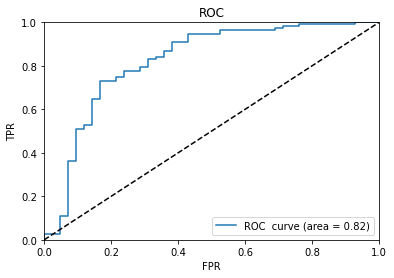

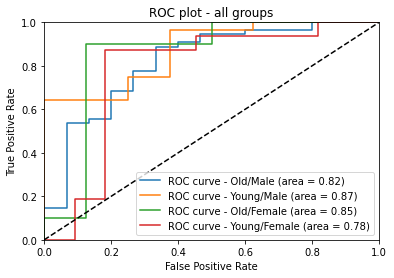

In [19]:
# Repeats whole procedure on resampled dataset

best = (-1, None)

for comb in hp_combs:
    clf = RandomForestClassifier(class_weight="balanced", n_jobs=-1, min_samples_leaf=comb[0], max_features=comb[1], criterion=comb[2], max_depth=comb[3], min_samples_split=comb[4], random_state=0)
    clf.fit(new_X_train, new_y_train)
    score = score_auc(clf, X_val, y_val)
    if score > best[0]:
        best = (score, clf)
        
clf = best[1]

yp = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yp)
plot_curve(tpr, fpr)

fprs = []
tprs = []

yp_om = clf.predict_proba(X_test_old_male)[:,1]
fpr, tpr, _ = roc_curve(y_test_old_male, yp_om)
fprs.append(fpr)
tprs.append(tpr)

yp_ym = clf.predict_proba(X_test_young_male)[:,1]
fpr, tpr, _ = roc_curve(y_test_young_male, yp_ym)
fprs.append(fpr)
tprs.append(tpr)

yp_of = clf.predict_proba(X_test_old_female)[:,1]
fpr, tpr, _ = roc_curve(y_test_old_female, yp_of)
fprs.append(fpr)
tprs.append(tpr)

yp_yf = clf.predict_proba(X_test_young_female)[:,1]
fpr, tpr, _ = roc_curve(y_test_young_female, yp_yf)
fprs.append(fpr)
tprs.append(tpr)

plot_all_roc(tprs, fprs, "ROC plot - all groups", ["Old/Male", "Young/Male", "Old/Female", "Young/Female"])

In [20]:
eval_fair_acc(clf, X_test_old_male, X_test_old_female, X_test_young_male, X_test_young_female, X_test, y_test)

Accuracy: 0.8066666666666666 
Utility: 0.7493386243386244
Old/Young ZF: 0.09906951286261634 
Old/Young DI: 0.873249299719888
Male/Female ZF: 0.07301587301587298 
Male/Female DI: 0.9041666666666667


(0.8066666666666666,
 0.7493386243386244,
 0.09906951286261634,
 0.873249299719888,
 0.07301587301587298,
 0.9041666666666667)

In [21]:
# Now begins the fair ML implementation, starting again at "data" with no splitting into X and y or test and train

import math

# Python implementation of pseudocode outlined in Feldman figure 1, modified to work with pandas etc.
def unique_value_data_structures(df):
    sorted_lists = {}
    index_lookups = {}
    for col in df.columns:
        sorted_list = sorted(df[col].unique())
        sorted_lists[col] = sorted_list
        index_lookup = {}
        for i in range(len(sorted_list)):
            val = sorted_list[i]
            index_lookup[val] = i
        index_lookups[col] = index_lookup
    return sorted_lists, index_lookups
    
def median(l):
    if len(l):
        return sorted(l)[len(l)//2]

# Implementation of repair process outline in Feldman figure 3, modified to work with pandas etc. and
# my current implementation as a whole
def repair(df, Y_cols, S_combinations, num_quantiles, sorted_lists, index_lookups, l, group_sizes, repair_type="geometric"):
    df_prime = df.copy() # Create a copy of the dataset to work on
    qu = 1.0/num_quantiles # Work out what fraction of the column should be in each quantile
    for col in Y_cols:
        for quantile in range(num_quantiles):     
            median_values_at_quantile = []
            entries_at_quantile = []
            for group in S_combinations:
                # I calculate the start and end positions of the quantiles slightly differently to Feldman
                start_quantile = round(quantile*qu*group_sizes[group])
                end_quantile = round((quantile+1)*qu*group_sizes[group])
                # Get this quartile's entries
                entries = df.query("S == @group")[col].sort_values()[start_quantile:end_quantile]
                values = entries.values
                entries_at_quantile.extend(entries.index)
                median_values_at_quantile.append(median(values))
            # Calculate the target value and its index location
            target_value = median(median_values_at_quantile)
            position_of_target = index_lookups[col][target_value]
            
            # Perform repair
            for i in entries_at_quantile:
                val = df.at[i, col]
                if repair_type == "combinatorial":
                    orig_pos = index_lookups[col][val]
                    distance = position_of_target - orig_pos
                    distance_to_repair = round(distance * l)
                    index_repair = orig_pos + distance_to_repair
                    df_prime.at[i, col] = sorted_lists[col][index_repair]
                else:
                    df_prime.at[i, col] = (1 - l)*val + l*target_value
    return df_prime

# Used to combine the age and sex columns
def transform_age_sex(row):
    if row["Age"] == 1 and row["Sex"] == 1:
        return "OldMale"
    elif row["Age"] == 0 and row["Sex"] == 1:
        return "YoungMale"
    elif row["Age"] == 1 and row["Sex"] == 0:
        return "OldFemale"
    else:
        return "YoungFemale"

In [22]:
# Prepare dataset
data["S"] = data.apply(transform_age_sex, axis=1)
data = data.drop(["Age", "Sex"], axis=1)

S_groups = ["OldMale", "YoungMale", "OldFemale", "YoungFemale"]
group_sizes = {g:len(data.loc[data["S"] == g]) for g in S_groups}

In [23]:
# Get lists for the repair tool
sl, il = unique_value_data_structures(data)

# Get unprotected columns
Y = list(data.columns)
Y.remove("S")
Y.remove("Risk")

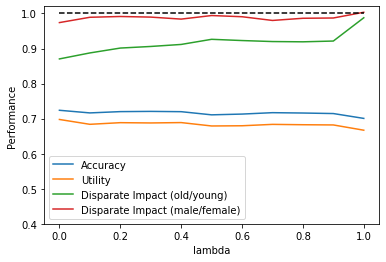

In [27]:
# Calculate metrics for varying lambda to see how the repair tool changes the result
# NOTE FOR MARKERS: This takes *ages* to run

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

metrics = {
    "Accuracy": [],
    "Utility": [],
    "Disparate Impact (old/young)": [],
    "Disparate Impact (male/female)": []
}

for l in np.linspace(0, 1, 11): # Iterate through values of lambda
    group_sizes = {g:len(data.loc[data["S"] == g]) for g in S_groups}
    # Repair the dataset with that parameter
    total_acc = 0
    total_utility = 0
    total_oydi = 0
    total_mfdi = 0
    dp = repair(data, Y, S_groups, min(group_sizes.values()), sl, il, l, group_sizes, "geometric")
    for i in range(20):
        X = dp.drop(["Risk"], axis=1)
        y = dp["Risk"]
        # Create new training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=i)
        # Train random forest model
        comb = best_comb

        clf = RandomForestClassifier(class_weight="balanced", n_jobs=-1, min_samples_leaf=comb[0], max_features=comb[1], criterion=comb[2], max_depth=comb[3], min_samples_split=comb[4], random_state=0)
        clf.fit(X_train.drop(["S"], axis=1), y_train)

        # Split dataset into demographic groups
        X_test_old_male = X_test.loc[X_test["S"] == "OldMale"].drop(["S"], axis=1)
        y_test_old_male = y_test[X_test_old_male.index]

        X_test_young_male = X_test.loc[X_test["S"] == "YoungMale"].drop(["S"], axis=1)
        y_test_young_male = y_test[X_test_young_male.index]

        X_test_old_female = X_test.loc[X_test["S"] == "OldFemale"].drop(["S"], axis=1)
        y_test_old_female = y_test[X_test_old_female.index]

        X_test_young_female = X_test.loc[X_test["S"] == "YoungFemale"].drop(["S"], axis=1)
        y_test_young_female = y_test[X_test_young_female.index]
    
        # Evaluate inequality metrics
        acc, utility, oyzf, oydi, mfzf, mfdi = eval_fair_acc(clf, X_test_old_male, X_test_old_female, X_test_young_male, X_test_young_female, X_test.drop(["S"], axis=1), y_test, output=False)
        total_acc += acc
        total_utility += utility
        total_oydi += oydi
        total_mfdi += mfdi
    metrics["Accuracy"].append(total_acc/20)
    metrics["Utility"].append(total_utility/20)
    metrics["Disparate Impact (old/young)"].append(total_oydi/20)
    metrics["Disparate Impact (male/female)"].append(total_mfdi/20)
    

plt.figure()
for metric in metrics.keys():
    plt.plot(np.linspace(0, 1, 11), metrics[metric], label=metric)
plt.xlabel("lambda")
plt.ylabel("Performance")
plt.ylim(bottom=0.4)
plt.legend(loc="best")
plt.plot([0,1], [1, 1], "k--")
plt.show()
